# Gráficos e Python

Gráficos são a maneira mais direta de representar relações entre variáveis, oferecendo *insights* poderosos e agilizando a análise ou tomada de decisões. Em Python, existem diversas bibliotecas capazes de processamento gráfico e elaboração de gráficos a partir de *templates*, como `plotly` e `seaborn`. Contudo, nesta seção, exploraremos o pacote `matplotlib`, o mais adequado para iniciantes. Na nossa análise, utilizaremos uma base de dados real, advinda de pesquisa de campo relativa a malária na Região Norte do Brasil. Empregaremos também o pacote `pandas` para importação dos dados e criação dos *dataframes*.

In [ ]:
from google.colab import drive, files
import pandas as pd
import matplotlib.pyplot as plt

path_abs = '/content/drive/My Drive'
path_morador = '/Curso de Python/Bases/base_morador.xlsx'
path_domicilio = '/Curso de Python/Bases/base_temp.xlsx'

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_excel(path_abs+path_morador)
df1.head()

,id,id_domicilio,zona,municipio,num_moradores,id_morador,relacao_responsavel,sexo,idade,teve_malaria,...,malaria_2022,malaria_2019_22,ano_malaria,mes_malaria,dia_malaria,cura_atual,dias_atual,sintomas_atual,internacao_atual,status
0,1,1,2,1,9,1,1,1,44.0,1.0,...,0.0,1.0,2022.0,1.0,NaN,NaN,NaN,NaN,1.0,5
1,2,1,2,1,9,2,2,2,43.0,1.0,...,1.0,NaN,2022.0,2.0,NaN,NaN,NaN,NaN,0.0,5
2,3,1,2,1,9,3,3,2,6.0,1.0,...,1.0,NaN,2022.0,2.0,NaN,NaN,NaN,NaN,0.0,5
3,4,1,2,1,9,4,3,1,4.0,1.0,...,0.0,1.0,2022.0,4.0,27.0,NaN,NaN,NaN,1.0,5
4,5,1,2,1,9,5,3,1,13.0,1.0,...,1.0,NaN,2022.0,2.0,NaN,NaN,NaN,NaN,1.0,5


In [ ]:
df2 = pd.read_excel(path_abs+path_domicilio)
df2.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,id_domicilio,zona,municipio,num_moradores,comodos,banheiros,som,tv,dvd,geladeira,...,mes_malaria,dia_malaria,internacao,grupo_data,multiplos_beneficios,multiplos_tratamentos,configuracao_familiar,trimestre_malaria,uf,faixa_etaria
0,1,2,1,9,3,2,0,0,0,1,...,1.0,NaN,1.0,1,0.0,NaN,5,1.0,11,2.0
1,2,2,1,6,5,1,0,1,0,1,...,1.0,NaN,0.0,1,0.0,NaN,5,1.0,11,1.0
2,3,2,1,7,4,1,0,1,0,1,...,2.0,NaN,0.0,2,NaN,0.0,5,1.0,11,2.0
3,4,2,1,3,5,2,1,1,1,1,...,12.0,12.0,0.0,1,1.0,1.0,5,4.0,11,2.0
4,5,2,1,4,4,2,0,1,0,0,...,8.0,20.0,0.0,1,0.0,0.0,3,3.0,11,2.0


## Tipos de Gráficos

Apresentaremos aqui conceitos relativos aos principais tipos de gráficos:


*   *Scatter*;
*   *Boxplot*;
*   Histograma;
*   Linha;
*   Barras,
*   Proporções.

Atente-se também aos elementos do gráfico (títulos, eixos, legendas) desenvolvidos em cada gráfico.



## *Scatter*

Um gráfico *scatter*, ou de dispersão, traz a relação entre (tipicamente) duas variáveis numéricas, cada qual representada em um dos eixos. É útil para indicar tendências ou agrupamentos. Deve haver um par ordenado (x,y) formado entre cada um dos eixos. A função utilizada é a `plt.scatter()`.

In [ ]:
path_fig = '/Curso de Python/Gráficos'

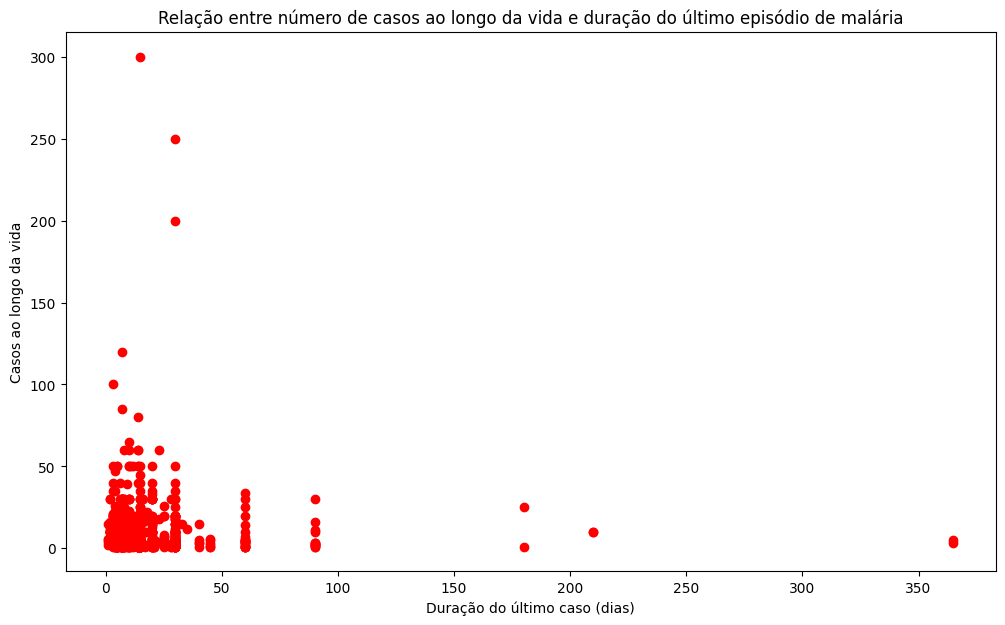

In [ ]:
plt.figure(figsize = (12,7))
plt.scatter(df2['dias_malaria'], df2['casos_malaria'], c= 'red')
plt.xlabel('Duração do último caso (dias)')
plt.ylabel('Casos ao longo da vida')
plt.title('Relação entre número de casos ao longo da vida e duração do último episódio de malária')
plt.savefig(path_abs+path_fig+'/scatter1.png')


Podemos também plotar dois grupos distintos no mesmo *scatter* plot.

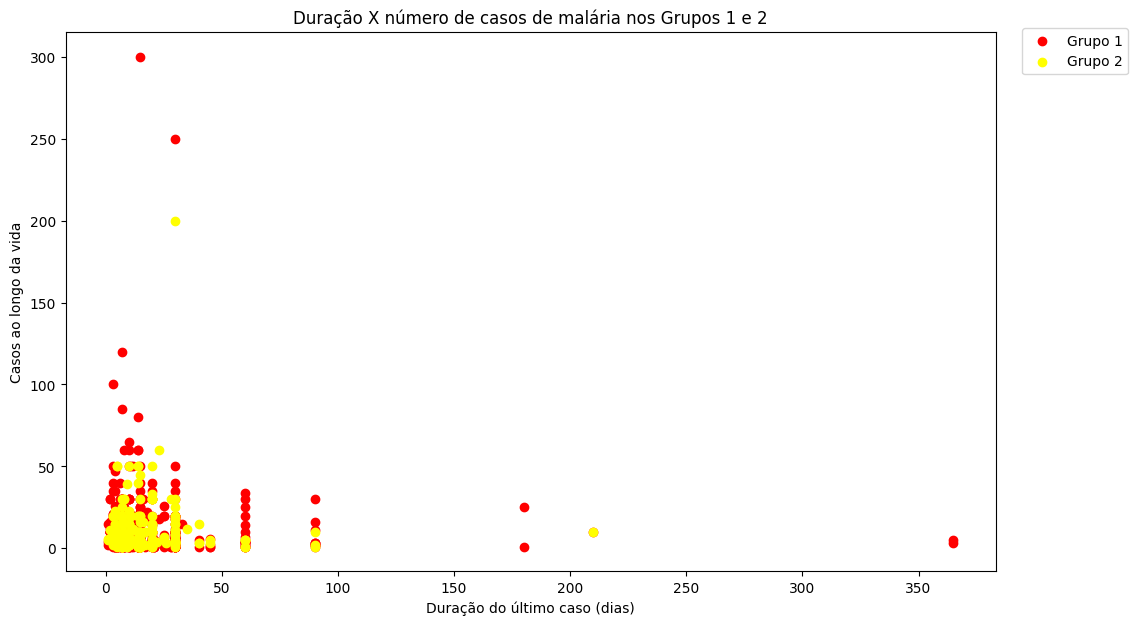

In [ ]:
plt.figure(figsize = (12,7))
plt.scatter(df2['dias_malaria'][df2['grupo_data'] == 1], df2['casos_malaria'][df2['grupo_data'] == 1], label = 'Grupo 1', c= 'red')
plt.scatter(df2['dias_malaria'][df2['grupo_data'] == 2], df2['casos_malaria'][df2['grupo_data'] == 2], label = 'Grupo 2',c= 'yellow')
plt.xlabel('Duração do último caso (dias)')
plt.ylabel('Casos ao longo da vida')
plt.title('Duração X número de casos de malária nos Grupos 1 e 2')
plt.legend(bbox_to_anchor=[1.15, 1.02])
plt.savefig(path_abs+path_fig+'/scatter2.png')

Para melhor visualização, pode-se remover os *outliers*.

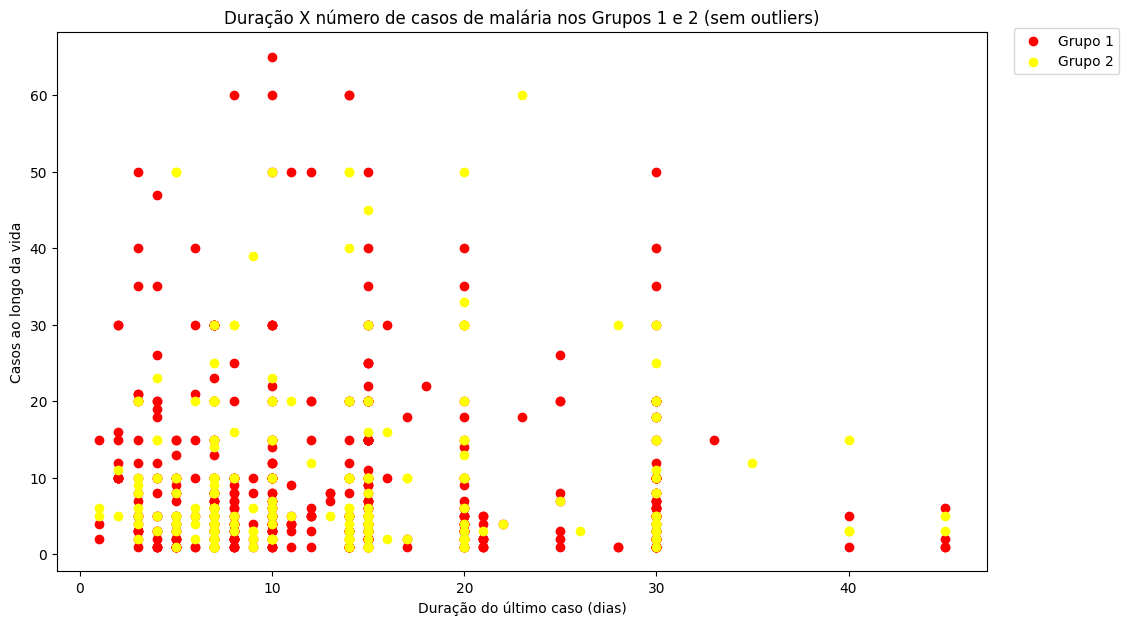

In [ ]:
plt.figure(figsize = (12,7))
plt.scatter(df2['dias_malaria'][(df2['grupo_data'] == 1)&(df2['dias_malaria']<50)&(df2['casos_malaria']<75)], df2['casos_malaria'][(df2['grupo_data'] == 1)&(df2['dias_malaria']<50)&(df2['casos_malaria']<75)], label = 'Grupo 1', c= 'red')
plt.scatter(df2['dias_malaria'][(df2['grupo_data'] == 2)&(df2['dias_malaria']<50)&(df2['casos_malaria']<75)], df2['casos_malaria'][(df2['grupo_data'] == 2)&(df2['dias_malaria']<50)&(df2['casos_malaria']<75)], label = 'Grupo 2',c= 'yellow')
plt.xlabel('Duração do último caso (dias)')
plt.ylabel('Casos ao longo da vida')
plt.title('Duração X número de casos de malária nos Grupos 1 e 2 (sem outliers)')
plt.legend(bbox_to_anchor=[1.15, 1.02])
plt.savefig(path_abs+path_fig+'/scatter3.png')

## *Boxplot*

Boxplot é um gráfico de extrema utilidade, por representar ao mesmo tempo a localização, o espalhamento e a distribuição de variáveis, sendo um resumo de estatísticas descritivas. A função utilizada é a `boxplot()`.

Num primeiro momento, veremos um boxplot horizontal (paramêtro `vert = 0`), adequado para medidas de tempo, já sem os *outliers*.

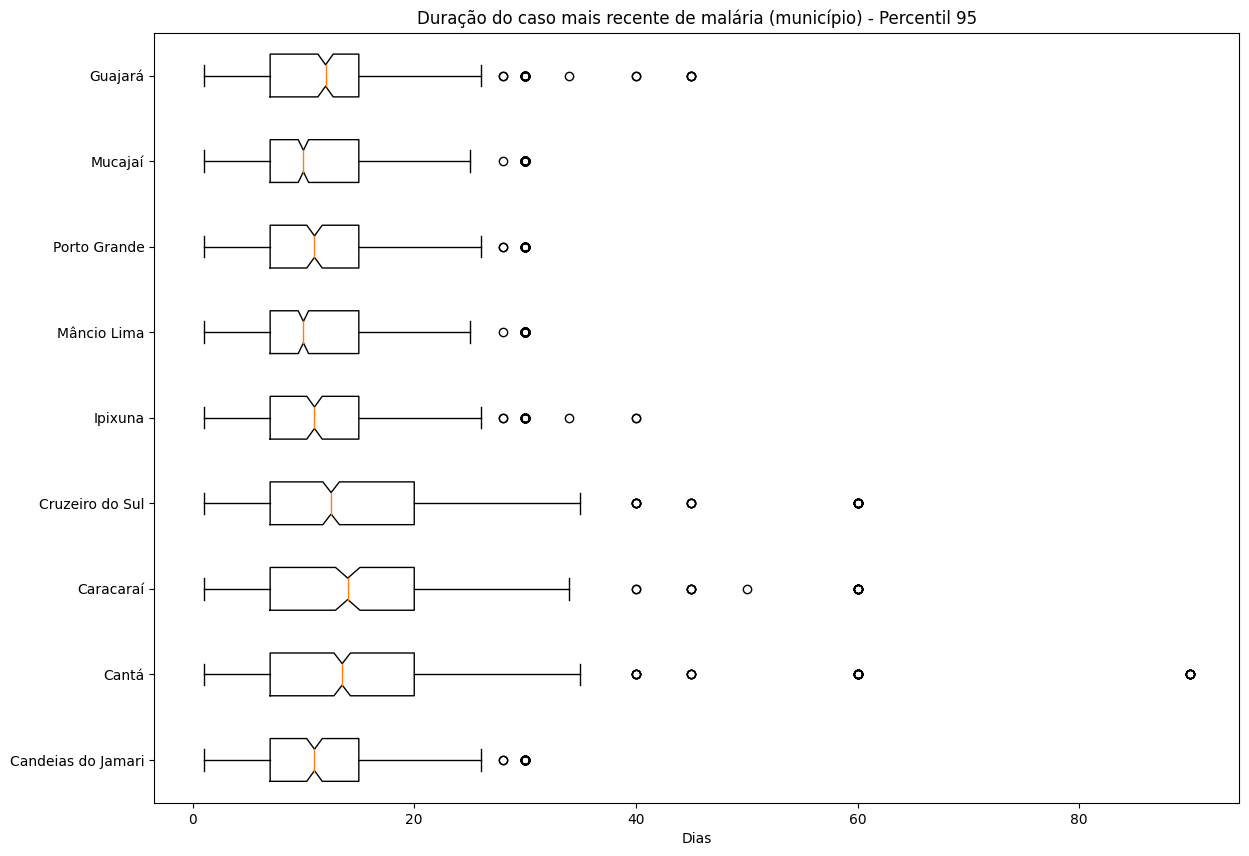

In [ ]:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (14, 10)
                       )

c1 = df2[(df2.zona == 1)&(df2.dias_malaria <= 33)]['dias_malaria'].dropna()
c2 = df2[(df2.zona == 2)&(df2.dias_malaria <= 90)]['dias_malaria'].dropna()
c3 = df2[(df2.zona == 1)&(df2.dias_malaria <= 60)]['dias_malaria'].dropna()
c4 = df2[(df2.zona == 2)&(df2.dias_malaria <= 60)]['dias_malaria'].dropna()
c5 = df2[(df2.zona == 1)&(df2.dias_malaria <= 41)]['dias_malaria'].dropna()
c6 = df2[(df2.zona == 2)&(df2.dias_malaria <= 30)]['dias_malaria'].dropna()
c7 = df2[(df2.zona == 1)&(df2.dias_malaria <= 30)]['dias_malaria'].dropna()
c8 = df2[(df2.zona == 2)&(df2.dias_malaria <= 30)]['dias_malaria'].dropna()
c9 = df2[(df2.zona == 1)&(df2.dias_malaria <= 45)]['dias_malaria'].dropna()

data = [c1, c2, c3, c4, c5, c6, c7, c8, c9]
labels = ['Candeias do Jamari', 'Cantá', 'Caracaraí', 'Cruzeiro do Sul', 'Ipixuna', 'Mâncio Lima', 'Porto Grande', 'Mucajaí', 'Guajará']

bp = axs.boxplot(data, patch_artist = False,
                notch ='True', vert = 0)
axs.set_yticklabels(labels)

axs.set_title("Duração do caso mais recente de malária (município) - Percentil 95")
axs.set_xlabel('Dias')
plt.savefig(path_abs+path_fig+'/boxplot1.png')

Posteriormente, veremos um boxplot vertical (paramêtro `vert = 1`), adequado para medidas monetárias, também sem os *outliers*.

Text(0, 0.5, 'Gasto (R$)')

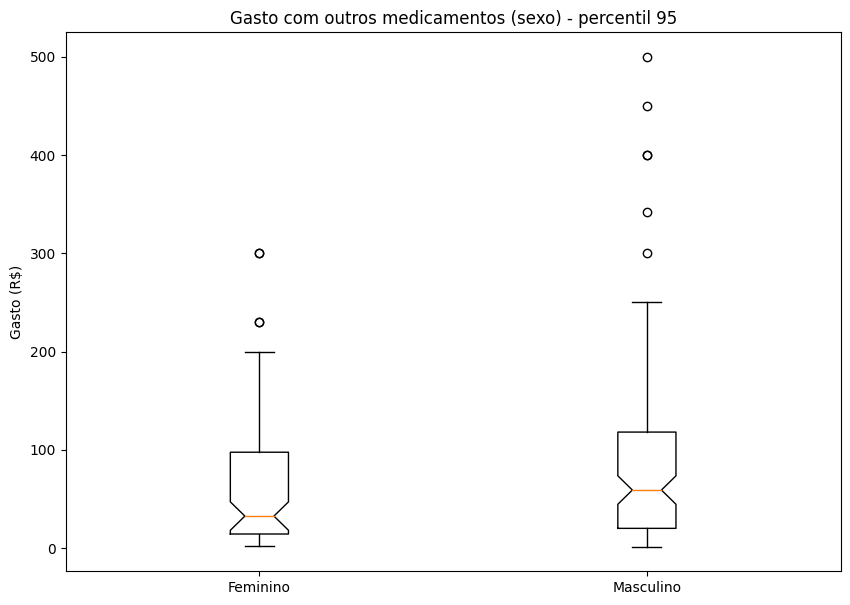

In [ ]:
m = df2[df2.sexo == 1]
h = df2[df2.sexo == 2]

fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (10, 7)
                       )

z1 = m[(m.outro_medicamento == 1)&(m.gasto_outro_medicamento<=300)]['gasto_outro_medicamento'].dropna()
z2 = h[(h.outro_medicamento == 1)&(h.gasto_outro_medicamento<=500)]['gasto_outro_medicamento'].dropna()
data = [z1, z2]
labels = ['Feminino','Masculino']

bp = axs.boxplot(data, patch_artist = False,
                notch ='True', vert = 1)
axs.set_xticklabels(labels)
axs.set_title("Gasto com outros medicamentos (sexo) - percentil 95")
axs.set_ylabel('Gasto (R$)')
plt.savefig(path_abs+path_fig+'/boxplot2.png')

## Histograma

O histograma representa a distribuição de dados quantitativo, em relação a uma série de faixa de intervalos (*bins*). É útil para uma estimação inicial da distribuição de probabilidade. A função utilizada é a `histogram()`.

**Atenção:** o histograma NÃO é sempre igual a um gráfico de frequência relativa. Isto só ocorre se os *bins* forem unitários.

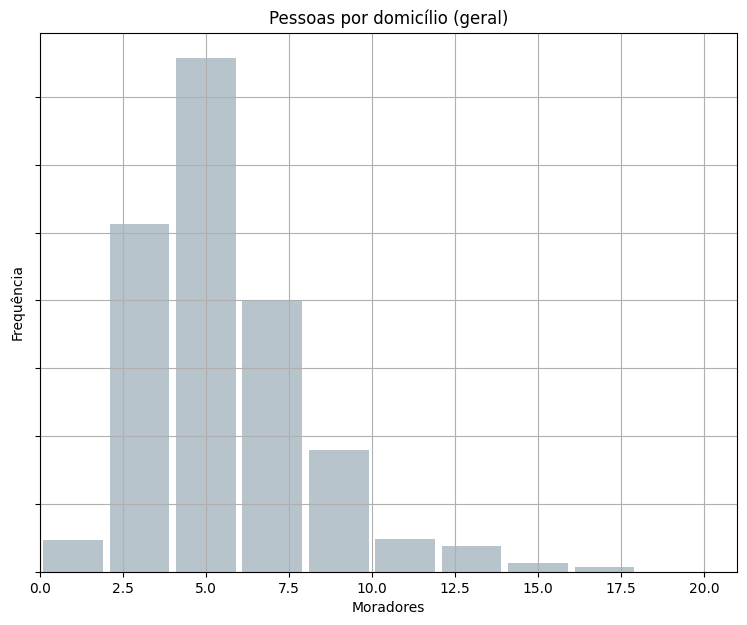

In [ ]:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (9, 7)
                       )


valores = [0]*32
for i in range(1,32):
    valores[i] = valores[i-1]+2

df1['num_moradores'].plot.hist(grid=True, density = True, bins=valores, rwidth=0.9, alpha = 0.45, ax = axs,
                color='#607c8e')
axs.set_xlim(0, 21)
axs.set_yticklabels([])
axs.set_ylabel('Frequência')
axs.set_xlabel('Moradores')
axs.set_title("Pessoas por domicílio (geral)")
plt.savefig(path_abs+path_fig+'/histograma1.png')

Podemos também plotar o *k-density* e indicadores de posição dos percentis.

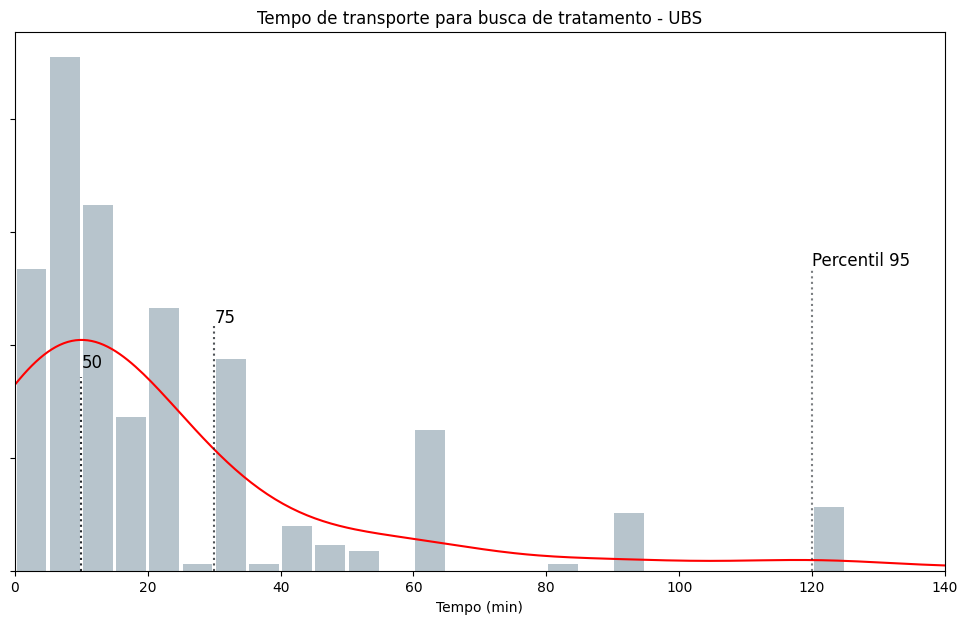

In [ ]:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (12, 7)
                       )


valores = [0]*288
for i in range(1,288):
    valores[i] = valores[i-1]+5

df2['tempo_transporte_ubs'].plot.hist(grid=True, density = True, bins=valores, rwidth=0.9, alpha = 0.45, ax = axs,
                color='#607c8e')
axs.set_xlim(0, 140)
axs.set_yticklabels([])
axs.set_ylabel('Frequência')
axs.set_xlabel('Tempo (min)')

df2['tempo_transporte_ubs'].plot(kind = "kde", color = 'red')
quant_50, quant_75, quant_95 = df2['tempo_transporte_ubs'].quantile(0.5), df2['tempo_transporte_ubs'].quantile(0.75), df2['tempo_transporte_ubs'].quantile(0.95)

quants = [ [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

for i in quants:
    axs.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":",color = '#23282D')

axs.text(quant_50, 0.018, "50", size = 12, alpha = 1)
axs.text(quant_75, 0.022, "75", size = 12, alpha = 1)
axs.text(quant_95, 0.027, "Percentil 95", size = 12, alpha = 1)
axs.set_ylabel("")
axs.set_title("Tempo de transporte para busca de tratamento - UBS")
plt.savefig(path_abs+path_fig+'/histograma2.png')

## Linhas

Gráficos de linha são fundamentais para demonstração de tendências em relação ao tempo. A função utilizada é a `plt.plot()`.

In [ ]:
df_t = df2[df2['ano_malaria'] == 2021].groupby('mes_malaria').count()['id_domicilio'].reset_index()
meses = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
for i,mes in zip(range(13),meses):
  df_t.loc[i, 'mes_malaria'] = mes
df_t.rename(columns = {'id_domicilio':'casos'}, inplace = True)
display(df_t)

<ipython-input-67-1af85e1037a6>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'jan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_t.loc[i, 'mes_malaria'] = mes


,mes_malaria,casos
0,jan,22
1,fev,20
2,mar,14
3,abr,19
4,mai,13
5,jun,12
6,jul,23
7,ago,18
8,set,24
9,out,46


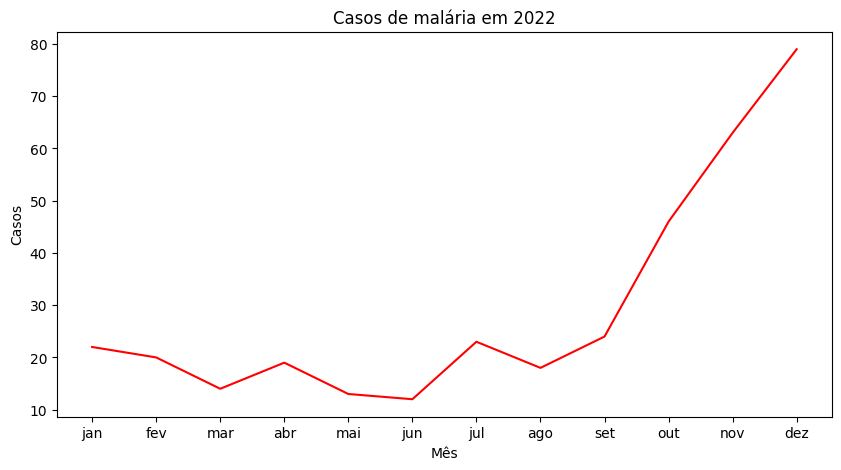

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(df_t['mes_malaria'], df_t['casos'], color = 'red')
plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Casos de malária em 2022')
plt.savefig(path_abs+path_fig+'/linha1.png')

Podemos plotar também mais de uma linha e usar marcadores.

In [ ]:
df_2019 = df2[df2['ano_malaria'] == 2019].groupby('mes_malaria').count()['id_domicilio'].reset_index()
df_2020 = df2[df2['ano_malaria'] == 2020].groupby('mes_malaria').count()['id_domicilio'].reset_index()
df_2021 = df2[df2['ano_malaria'] == 2021].groupby('mes_malaria').count()['id_domicilio'].reset_index()

df_anos = [df_2019, df_2020, df_2021]
meses = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
for df_ano in df_anos:
  for i,mes in zip(range(13),meses):
    df_ano.loc[i, 'mes_malaria'] = mes
    df_ano.rename(columns = {'id_domicilio':'casos'}, inplace = True)
  display(df_ano)

<ipython-input-79-e58ebcc24389>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'jan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ano.loc[i, 'mes_malaria'] = mes


,mes_malaria,casos
0,jan,27
1,fev,14
2,mar,18
3,abr,13
4,mai,10
5,jun,13
6,jul,16
7,ago,8
8,set,8
9,out,8


<ipython-input-79-e58ebcc24389>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'jan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ano.loc[i, 'mes_malaria'] = mes


,mes_malaria,casos
0,jan,10
1,fev,13
2,mar,13
3,abr,3
4,mai,8
5,jun,8
6,jul,8
7,ago,5
8,set,5
9,out,3


<ipython-input-79-e58ebcc24389>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'jan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ano.loc[i, 'mes_malaria'] = mes


,mes_malaria,casos
0,jan,22
1,fev,20
2,mar,14
3,abr,19
4,mai,13
5,jun,12
6,jul,23
7,ago,18
8,set,24
9,out,46


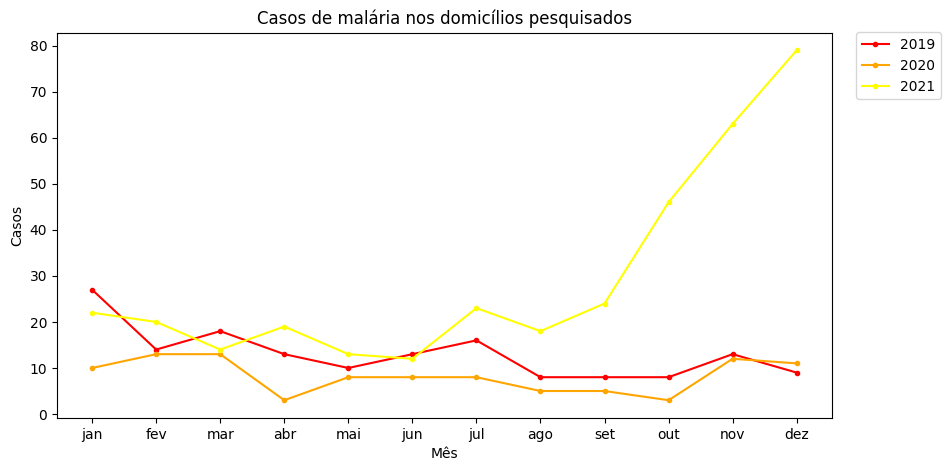

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(df_2019['mes_malaria'], df_2019['casos'], color = 'red', marker = '.', label = '2019')
plt.plot(df_2020['mes_malaria'], df_2020['casos'], color = 'orange', marker = '.', label = '2020')
plt.plot(df_2021['mes_malaria'], df_2021['casos'], color = 'yellow', marker = '.', label = '2021')
plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Casos de malária nos domicílios pesquisados')
plt.legend(bbox_to_anchor=[1.15, 1.02])
plt.savefig(path_abs+path_fig+'/linha2.png')

## Barras

Gráficos de barras são úteis para indicar a relação de totais entre variáveis. Existem em quatros variantes: horizontais, verticais, agrupadas e empilhadas.

### Barras horizontais

Devem ser usados quando a variável para a qual é exibido um total é categórica e possui muitos níveis distintos, que dificultariam a visualização vertical. A função utilizada é a `plt.barh()`.

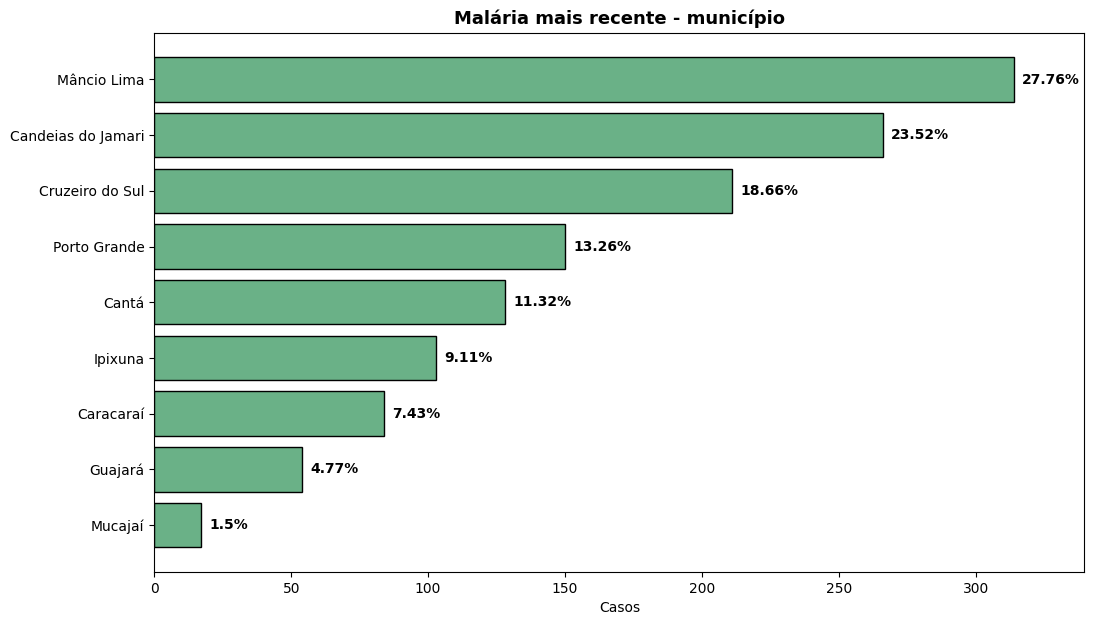

In [ ]:
c1 = df2[(df2.municipio == 1)]
c2 = df2[(df2.municipio == 2)]
c3 = df2[(df2.municipio == 3)]
c4 = df2[(df2.municipio == 4)]
c5 = df2[(df2.municipio == 5)]
c6 = df2[(df2.municipio == 6)]
c7 = df2[(df2.municipio == 7)]
c8 = df2[(df2.municipio == 8)]
c9 = df2[(df2.municipio == 9)]

fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (12, 7)
                       )


total = (len(c1)+len(c2)+len(c3)+len(c4)+len(c5)+len(c6)+len(c7)+len(c8)+len(c9))
valores = (len(c1),len(c2),len(c3),len(c4),len(c5),len(c6),len(c7),len(c8),len(c9))
labels = ['Mucajaí','Guajará','Caracaraí','Ipixuna','Cantá','Porto Grande','Cruzeiro do Sul','Candeias do Jamari','Mâncio Lima']
axs.barh(labels, sorted(valores, reverse = False), edgecolor ="black", color = "#6AB187")
_, xmax = plt.xlim()
plt.xlim(0, xmax+10)
for i, v in enumerate(sorted(valores, reverse = False)):
    axs.text(v + 3, i, str(round((v/1131)*100,2))+"%", color='black', fontweight='bold', fontsize=10, ha='left', va='center')
plt.title('Malária mais recente - município', fontsize=13, fontweight="bold")
plt.xlabel('Casos')
plt.savefig(path_abs+path_fig+'/barras1.png')

### Barras verticais

Devem ser utilizados quando os totais foram exibidos em relação ao tempo (que está no eixo x), ou quando foram organizados em relação a variáveis categóricas de poucos níveis. A função utilizada é a `plt.bar()`.

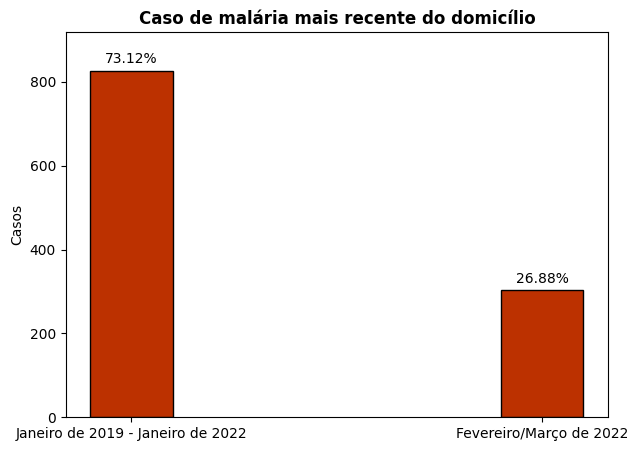

In [ ]:
df = pd.DataFrame(df2['grupo_data'][df2['grupo_data'] !=0].value_counts())
df['label'] = ['Janeiro de 2019 - Janeiro de 2022', 'Fevereiro/Março de 2022']
fig = plt.figure(figsize = (7, 5))

pps = plt.bar(df['label'], df['count'], color ='#BC3100', edgecolor ="black",
        width = 0.2)

_, ymax = plt.ylim()
plt.ylim(0, ymax+50)
for p in pps:
   altura = p.get_height()
   plt.annotate('{}'.format(str(((altura/df['count'].sum())*100).round(2))+'%'),
   xy=(p.get_x() + p.get_width() / 2, altura),
   xytext=(0, 3),
   textcoords="offset points",
   ha='center', va='bottom')
plt.ylabel('Casos')
plt.title("Caso de malária mais recente do domicílio", fontsize=12, fontweight="bold")
plt.savefig(path_abs+path_fig+'/barras2.png')

### Barras agrupadas

Devem ser utilizadas para mostrar o efeito (usualmente do tempo) em segmentos de variáveis, definidos com parcimônia para evitar confusão visual.

**Atenção:** é comum ver este gráfico ser confundido com histogramas. Histogramas apresentam a distribuição em termos de frequência de variáveis contínuas. Barras agrupadas, por sua vez, dispõe totais agrupados.

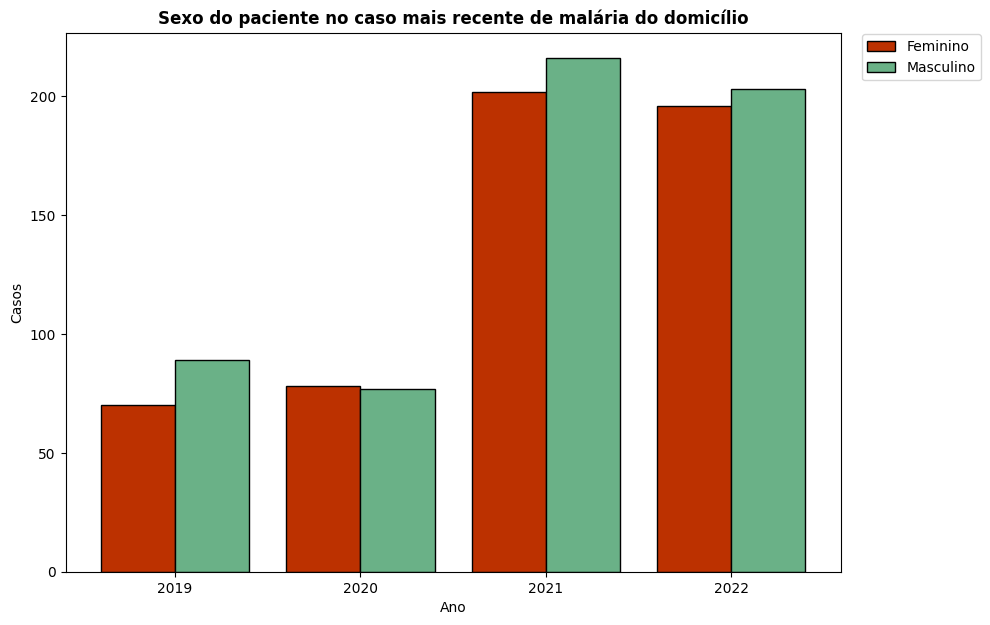

In [ ]:
import numpy as np

fig = plt.figure(figsize = (10, 7))

x = np.arange(4)
df_f = df2[(df2.sexo == 1)&(df2.grupo_data != 0)].groupby('ano_malaria')['id_domicilio'].count().reset_index()
df_m = df2[(df2.sexo == 2)&(df2.grupo_data != 0)].groupby('ano_malaria')['id_domicilio'].count().reset_index()
y1 = (df_f.loc[0,'id_domicilio'], df_f.loc[1,'id_domicilio'], df_f.loc[2,'id_domicilio'], df_f.loc[3,'id_domicilio'])
y2 = (df_m.loc[0,'id_domicilio'], df_m.loc[1,'id_domicilio'], df_m.loc[2,'id_domicilio'], df_m.loc[3,'id_domicilio'])
width = 0.40
plt.bar(x-0.2, y1, width, color = '#BC3100', edgecolor = 'black', label = 'Feminino')
plt.bar(x+0.2, y2, width, color = "#6AB187", edgecolor = 'black', label = 'Masculino')
plt.xticks(x, ['2019', '2020', '2021', '2022'])
plt.legend(bbox_to_anchor=[1.19, 1.01])
plt.ylabel('Casos')
plt.xlabel('Ano')
plt.title("Sexo do paciente no caso mais recente de malária do domicílio", fontsize=12, fontweight="bold")
plt.savefig(path_abs+path_fig+'/barras3.png')

### Barras empilhadas

São uma variante mais *clean* das barras agrupadas. Seguem as mesmas recomendações supra.

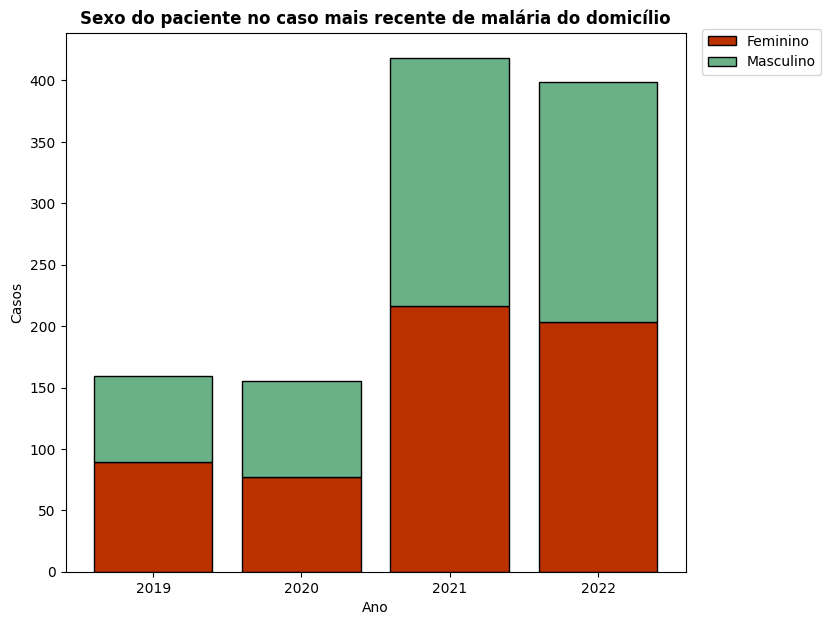

In [ ]:
fig = plt.figure(figsize = (8, 7))

x = np.arange(4)
df_f = df2[(df2.sexo == 1)&(df2.grupo_data != 0)].groupby('ano_malaria')['id_domicilio'].count().reset_index()
df_m = df2[(df2.sexo == 2)&(df2.grupo_data != 0)].groupby('ano_malaria')['id_domicilio'].count().reset_index()
y1 = (df_f.loc[0,'id_domicilio'], df_f.loc[1,'id_domicilio'], df_f.loc[2,'id_domicilio'], df_f.loc[3,'id_domicilio'])
y2 = (df_m.loc[0,'id_domicilio'], df_m.loc[1,'id_domicilio'], df_m.loc[2,'id_domicilio'], df_m.loc[3,'id_domicilio'])
plt.bar(x, y2, color = '#BC3100', edgecolor = 'black', label = 'Feminino')
plt.bar(x, y1, bottom = y2, color = "#6AB187", edgecolor = 'black', label = 'Masculino')
plt.xticks(x, ['2019', '2020', '2021', '2022'])
plt.legend(bbox_to_anchor=[1.23, 1.02])
plt.ylabel('Casos')
plt.xlabel('Ano')
plt.title("Sexo do paciente no caso mais recente de malária do domicílio", fontsize=12, fontweight="bold")
plt.savefig(path_abs+path_fig+'/barras4.png')

## Proporção

Gráficos usados quando se deseja indicar particpação relativa a um todo. Existem em duas variantes: pizza/donut e barras empilhadas percentuais.

### Gráficos *donut*

Recebem fortes críticas na atualizade, não sem alguma razão. Porém, não devem ser inteiramente descartados. Seu uso é recomendado quando há no máximo três categorias distintas, e indica-se ainda a variante *donut* em relação a pizza. A fun

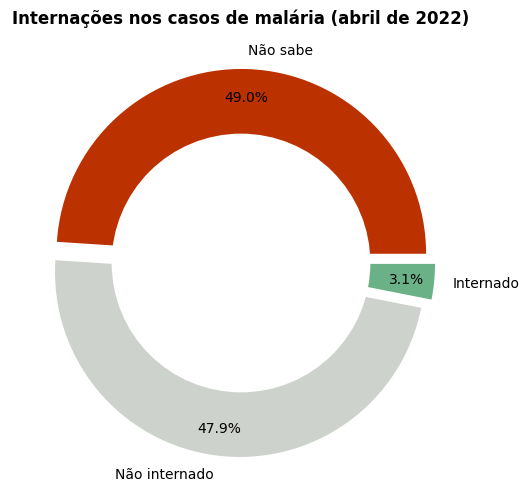

In [ ]:
from matplotlib.patches import Circle
df = pd.DataFrame(df1[(df1.malaria_hj == 1)]['internacao_atual'].value_counts(dropna = False))
valores = [df.iloc[0]['count'], df.iloc[1]['count'], df.iloc[2]['count']]

labels = ['Não sabe', 'Não internado', 'Internado']

fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (10, 6)
                       )

axs.pie(valores, colors=['#BC3100', "#CED2CC", "#6AB187"], labels=labels,
    autopct='%1.1f%%', pctdistance=0.85,
    explode=(0.05,)*len(labels))
centro_circulo = Circle((0, 0), 0.70, fc='white')
axs.add_patch(centro_circulo)

plt.title("Internações nos casos de malária (abril de 2022)", fontsize=12, fontweight="bold")
plt.savefig(path_abs+path_fig+'/proporcional1.png')

### Barras empilhadas percentuais

Usados quando há mais categorias ou queremos comparar diferentes recortes.

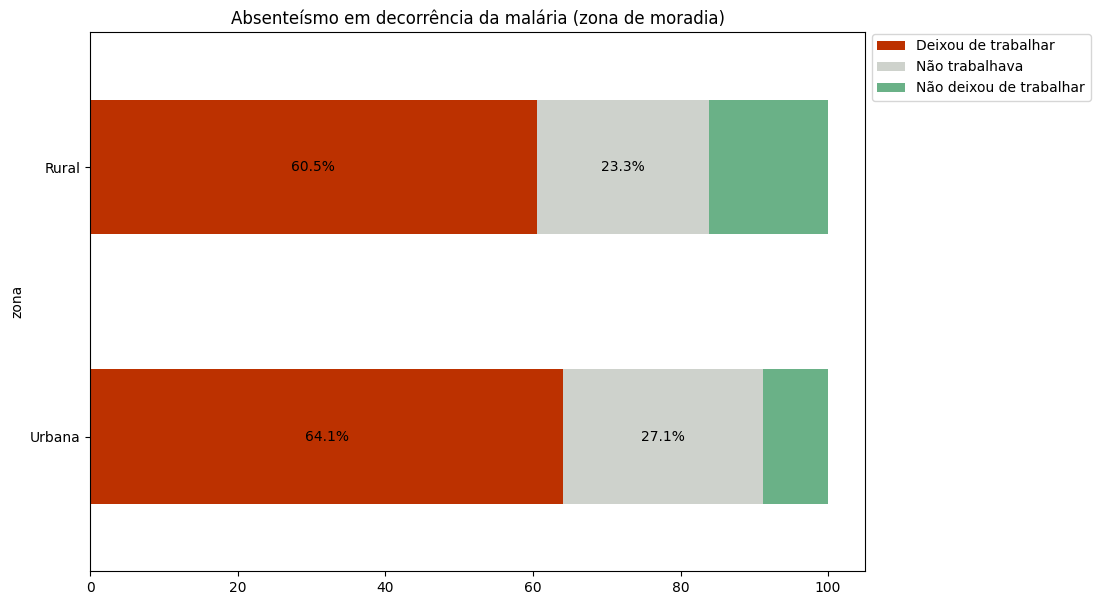

In [ ]:
zu = pd.DataFrame(df2[df2.zona == 1]['trabalho_mal'].value_counts(dropna = False)).T
zu['zona'] = 'Urbana'
zu.columns = ['trabalho_mal','deixou','n_trab','n_deixou','zona']

zr = pd.DataFrame(df2[df2.zona == 2]['trabalho_mal'].value_counts(dropna = False)).T
zr['zona'] = 'Rural'
zr.columns = ['trabalho_mal','deixou','n_trab','n_deixou','zona']


df = zu._append(zr)

df_total = df['deixou'] + df['n_trab'] + df['n_deixou']
df_rel = df[df.columns[1:3]].div(df_total, 0)*100

df['total'] = df['deixou'] + df['n_trab'] + df['n_deixou']
df['deixou_p'] = ((df['deixou']/df['total'])*100).round(2)
df['n_trab_p'] = ((df['n_trab']/df['total'])*100).round(2)
df['n_deixou_p'] = ((df['n_deixou']/df['total'])*100).round(2)

df = df.drop(['trabalho_mal','deixou', 'n_trab', 'n_deixou','total'], axis = 1)
df.columns = ['zona','deixou','n_trab','n_deixou']

fig = df.plot(
x = 'zona',
kind = 'barh',
stacked = True,
title = 'Absenteísmo em decorrência da malária (zona de moradia)',
mark_right = True,
figsize = (10,7),
color = ['#BC3100', "#CED2CC", "#6AB187", "#488A99"],
xlabel = '')

fig.legend(["Deixou de trabalhar", "Não trabalhava", "Não deixou de trabalhar"],bbox_to_anchor=[1.3, 1.01])

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n],
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',
                 va = 'center', ha = 'center')

plt.savefig(path_abs+path_fig+'/proporcional2.png')


# Subplots

A biblioteca matplotlib permite que criemos subplots, dispondo diversos gráficos em um plano cartesiano. Para isso, usamos a função `plt.subplots()`, com os argumentos `nrows` e `ncols`, denotando o número de linhas e colunas, respectivamente, bem como um sistema de eixo `axs`. Se, por exemplo, temos:

```
fig, axs = plt.subplots(nrows = 1,
                        ncols = 3,
                        figsize= (10, 6)
                       )
```

Criamos um eixo com três gráficos da seguinte forma:

**Gráfico 1** | **Gráfico 2** | **Gráfico 3**

Plotaríamos os gráficos substituindo `plt.plot()` por:

*     Gráfico 1: `axs[0].plot()`
*     Gráfico 2: `axs[1].plot()`
*     Gráfico 3: `axs[2].plot()`


O mesmo aconteceria se tivéssemos:

```
fig, axs = plt.subplots(nrows = 3,
                        ncols = 1,
                        figsize= (10, 6)
                       )
```
Com um eixo de gráficos:

**Gráfico 1**
_________
**Gráfico 2**
_________
**Gráfico 3**

Agora, como fazer se tivermos:

```
fig, axs = plt.subplots(nrows = 2,
                        ncols = 2,
                        figsize= (10, 6)
                       )
```
Neste caso, nosso eixo de gráficos é da forma:

**Gráfico 1** | **Gráfico 2**
__________  _________
**Gráfico 3**  **Gráfico 4**

Agora, nossa criação de gráficos deve ser:

*    Gráfico 1: `axs[0,0].plot()`
*    Gráfico 2: `axs[0,1].plot()`
*    Gráfico 3: `axs[1,0].plot()`
*    Gráfico 4: `axs[1,1].plot()`

As funções `xlabel` e `ylabel` se tornam `set_ylabel` e `set_xlabel`. Temos a possibilidade de nomear cada subplot com `set_title`, assim como um título geral para a figura com `suptitle`. Os exemplos abaixo ilustram o procedimento.


Text(0.5, 0.98, 'Malária nos domicílios pesquisados')

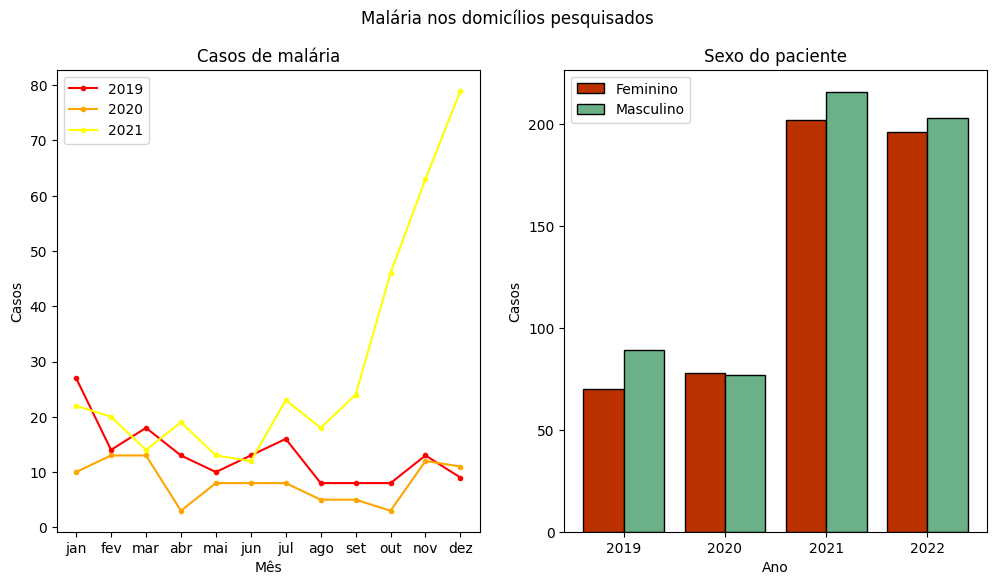

In [ ]:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 2,
                        figsize= (12, 6)
                       )
axs[0].plot(df_2019['mes_malaria'], df_2019['casos'], color = 'red', marker = '.', label = '2019')
axs[0].plot(df_2020['mes_malaria'], df_2020['casos'], color = 'orange', marker = '.', label = '2020')
axs[0].plot(df_2021['mes_malaria'], df_2021['casos'], color = 'yellow', marker = '.', label = '2021')
axs[0].set_xlabel('Mês')
axs[0].set_ylabel('Casos')
axs[0].set_title('Casos de malária')
axs[0].legend()
x = np.arange(4)
df_f = df2[(df2.sexo == 1)&(df2.grupo_data != 0)].groupby('ano_malaria')['id_domicilio'].count().reset_index()
df_m = df2[(df2.sexo == 2)&(df2.grupo_data != 0)].groupby('ano_malaria')['id_domicilio'].count().reset_index()
y1 = (df_f.loc[0,'id_domicilio'], df_f.loc[1,'id_domicilio'], df_f.loc[2,'id_domicilio'], df_f.loc[3,'id_domicilio'])
y2 = (df_m.loc[0,'id_domicilio'], df_m.loc[1,'id_domicilio'], df_m.loc[2,'id_domicilio'], df_m.loc[3,'id_domicilio'])
width = 0.40
axs[1].bar(x-0.2, y1, width, color = '#BC3100', edgecolor = 'black', label = 'Feminino')
axs[1].bar(x+0.2, y2, width, color = "#6AB187", edgecolor = 'black', label = 'Masculino')
axs[1].set_xticks(x, ['2019', '2020', '2021', '2022'])
axs[1].legend()
axs[1].set_ylabel('Casos')
axs[1].set_xlabel('Ano')
axs[1].set_title("Sexo do paciente")
fig.suptitle('Malária nos domicílios pesquisados')
plt.savefig(path_abs+path_fig+'/subplots1.png')

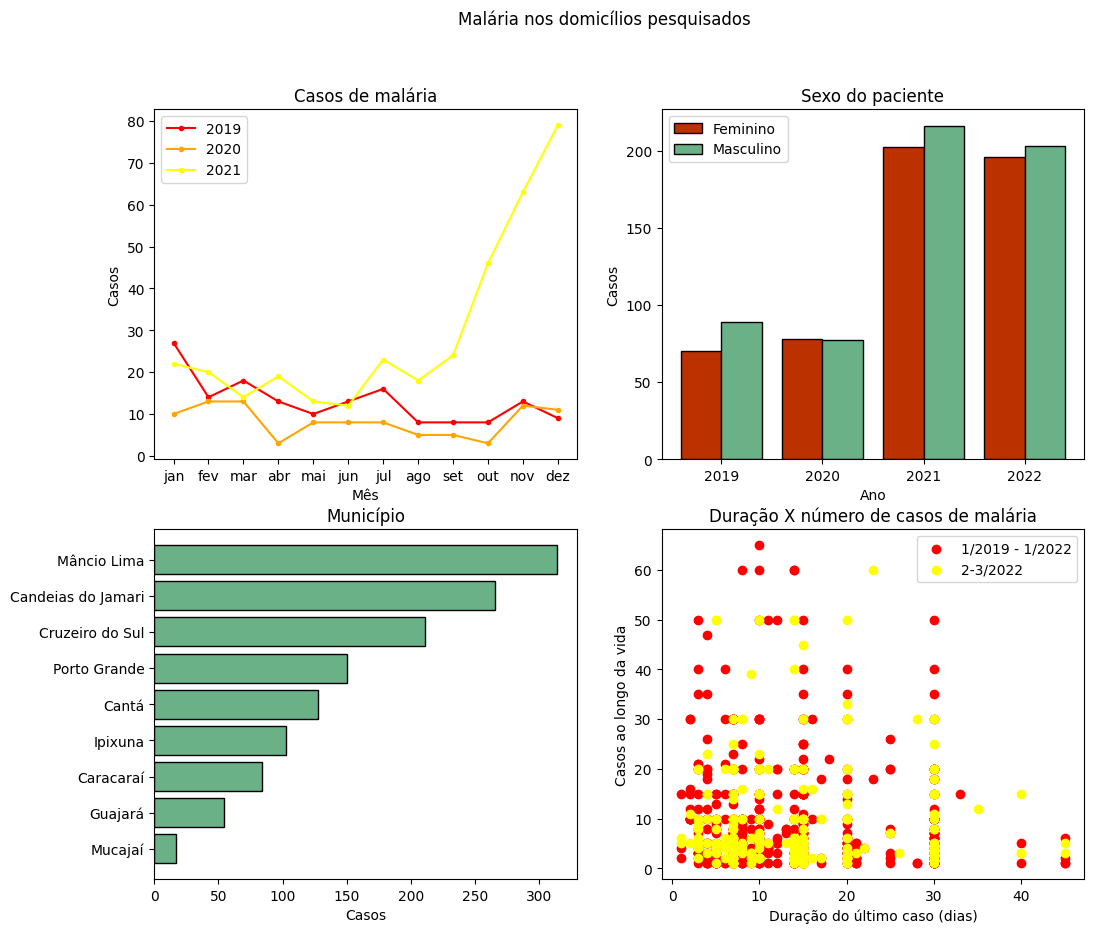

In [ ]:
fig, axs = plt.subplots(nrows = 2,
                        ncols = 2,
                        figsize= (12, 10)
                       )
axs[0,0].plot(df_2019['mes_malaria'], df_2019['casos'], color = 'red', marker = '.', label = '2019')
axs[0,0].plot(df_2020['mes_malaria'], df_2020['casos'], color = 'orange', marker = '.', label = '2020')
axs[0,0].plot(df_2021['mes_malaria'], df_2021['casos'], color = 'yellow', marker = '.', label = '2021')
axs[0,0].set_xlabel('Mês')
axs[0,0].set_ylabel('Casos')
axs[0,0].set_title('Casos de malária')
axs[0,0].legend()
x = np.arange(4)
df_f = df2[(df2.sexo == 1)&(df2.grupo_data != 0)].groupby('ano_malaria')['id_domicilio'].count().reset_index()
df_m = df2[(df2.sexo == 2)&(df2.grupo_data != 0)].groupby('ano_malaria')['id_domicilio'].count().reset_index()
y1 = (df_f.loc[0,'id_domicilio'], df_f.loc[1,'id_domicilio'], df_f.loc[2,'id_domicilio'], df_f.loc[3,'id_domicilio'])
y2 = (df_m.loc[0,'id_domicilio'], df_m.loc[1,'id_domicilio'], df_m.loc[2,'id_domicilio'], df_m.loc[3,'id_domicilio'])
width = 0.40
axs[0,1].bar(x-0.2, y1, width, color = '#BC3100', edgecolor = 'black', label = 'Feminino')
axs[0,1].bar(x+0.2, y2, width, color = "#6AB187", edgecolor = 'black', label = 'Masculino')
axs[0,1].set_xticks(x, ['2019', '2020', '2021', '2022'])
axs[0,1].legend()
axs[0,1].set_ylabel('Casos')
axs[0,1].set_xlabel('Ano')
axs[0,1].set_title("Sexo do paciente")
fig.suptitle('Malária nos domicílios pesquisados')
c1 = df2[(df2.municipio == 1)]
c2 = df2[(df2.municipio == 2)]
c3 = df2[(df2.municipio == 3)]
c4 = df2[(df2.municipio == 4)]
c5 = df2[(df2.municipio == 5)]
c6 = df2[(df2.municipio == 6)]
c7 = df2[(df2.municipio == 7)]
c8 = df2[(df2.municipio == 8)]
c9 = df2[(df2.municipio == 9)]

valores = (len(c1),len(c2),len(c3),len(c4),len(c5),len(c6),len(c7),len(c8),len(c9))
labels = ['Mucajaí','Guajará','Caracaraí','Ipixuna','Cantá','Porto Grande','Cruzeiro do Sul','Candeias do Jamari','Mâncio Lima']
axs[1,0].barh(labels, sorted(valores, reverse = False), edgecolor ="black", color = "#6AB187")
axs[1,0].set_title('Município')
axs[1,0].set_xlabel('Casos')

axs[1,1].scatter(df2['dias_malaria'][(df2['grupo_data'] == 1)&(df2['dias_malaria']<50)&(df2['casos_malaria']<75)], df2['casos_malaria'][(df2['grupo_data'] == 1)&(df2['dias_malaria']<50)&(df2['casos_malaria']<75)], label = '1/2019 - 1/2022', c= 'red')
axs[1,1].scatter(df2['dias_malaria'][(df2['grupo_data'] == 2)&(df2['dias_malaria']<50)&(df2['casos_malaria']<75)], df2['casos_malaria'][(df2['grupo_data'] == 2)&(df2['dias_malaria']<50)&(df2['casos_malaria']<75)], label = '2-3/2022',c= 'yellow')
axs[1,1].set_xlabel('Duração do último caso (dias)')
axs[1,1].set_ylabel('Casos ao longo da vida')
axs[1,1].set_title('Duração X número de casos de malária')
axs[1,1].legend()


plt.savefig(path_abs+path_fig+'/subplots2.png')